<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [87]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [8]:
# Answer: use the shape funtcion
movies.shape

(979, 6)

#### Check the data type of each column.

In [10]:
# Answer: use dtypes function
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [22]:
# Answer: loc[:,'duration] obtains the 'duration' column from movies 
#and mean() calculates the average for all rows in that column
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [28]:
# Answer for shortest movie, returning only the title:
#sort_values will sort movies on duration; head will return the first value (the lowest one); loc[:,'tite'] will return the title
movies.sort_values('duration').head(1).loc[:,'title']

389    Freaks
Name: title, dtype: object

In [29]:
# Answer for longest movie, returning only the title:
#sort_values will sort movies on duration; tail will return the last value (the longest one); loc[:,'tite'] will return the title
movies.sort_values('duration').tail(1).loc[:,'title']

476    Hamlet
Name: title, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

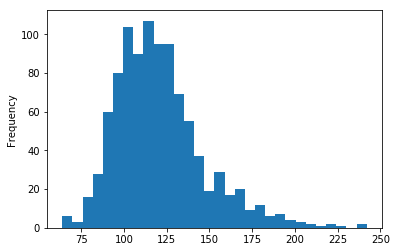

In [36]:
# Answer: first grab the 'duration' column and use plot function to create the histogram for 'duration'
movies.loc[:,'duration'].plot(kind='hist',bins=30);

#### Use a box plot to display that same data.

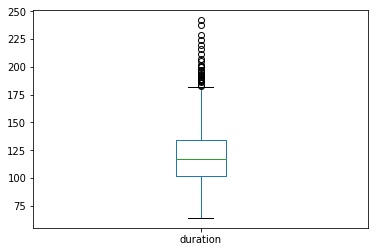

In [38]:
# Answer: change the kind of plot to box
movies.loc[:,'duration'].plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [40]:
# Answer: use value_counts() function on 'star_rating' column
movies.loc[:,'star_rating'].value_counts()

7.6    124
7.8    116
7.7    113
7.5    108
8.1    103
8.0     97
7.9     75
8.2     51
7.4     49
8.3     43
8.4     37
8.5     23
8.6     15
8.7     10
8.9      6
8.8      5
9.3      1
9.2      1
9.1      1
9.0      1
Name: star_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

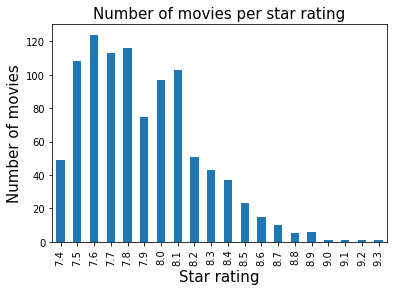

In [9]:
# Answer: use plot function and bar kind
movies.loc[:, 'star_rating'].value_counts().sort_index().plot(kind='bar');     
plt.xlabel('Star rating',fontsize=15); #this sets the x label
plt.ylabel('Number of movies',fontsize=15); #this sets the y label
plt.title('Number of movies per star rating',fontsize=15); #this sets the title of the chart

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [10]:
# Answer:each line below is looking for the rows in content_rating with the specific value and then replacing them with 'UNRATED'
movies.loc[movies.content_rating == 'NOT RATED', 'content_rating'] = 'UNRATED'
movies.loc[movies.content_rating == 'APPROVED', 'content_rating'] = 'UNRATED'
movies.loc[movies.content_rating == 'PASSED', 'content_rating'] = 'UNRATED'
movies.loc[movies.content_rating == 'GP', 'content_rating'] = 'UNRATED'

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [11]:
# Answer: each line below is looking for the rows in content_rating with the specific value and then replacing them with 'NC=17'
movies.loc[movies.content_rating == 'X', 'content_rating'] = 'NC-17'
movies.loc[movies.content_rating == 'TV-MA', 'content_rating'] = 'NC-17'
#check the values in content rating after replacements
movies.loc[:, 'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [75]:
# Answer: isnull() will return the null values and sums returns the sum of those null values
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [87]:
# Answer:
#first examine the rows by filtering for those with content_rating null values
movies.loc[movies.loc[:,'content_rating'].isnull(),:]
#assign 'UNRATED' to those that were null
movies.loc[movies.content_rating.isnull(), 'content_rating'] = 'UNRATED'
#check if changes worked, if no results back then it works
movies.loc[movies.loc[:,'content_rating'].isnull(),:]

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [98]:
# Answer:
#create a boolean variable for movies longer than 120 mins
long_movies = movies.loc[:,'duration']>=120
#look for the rows/movies longer than 120 mins by using the variable created before and average the durations
avg_long_movies = movies.loc[long_movies,'star_rating'].mean()
#create another boolean variable for movies less than 120 mins
short_movies = movies.loc[:,'duration']<120
#us the second boolean variable to find the movies and durations less than 2 hours long and average the duarations using mean()
avg_short_movies = movies.loc[short_movies,'star_rating'].mean()
#print the results for each result
print('Average star rating for movies 2 hours or longer:', avg_long_movies)
print('Average star rating for movies shorter than 2 hours:', avg_short_movies)

Average star rating for movies 2 hours or longer: 7.948898678414082
Average star rating for movies shorter than 2 hours: 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

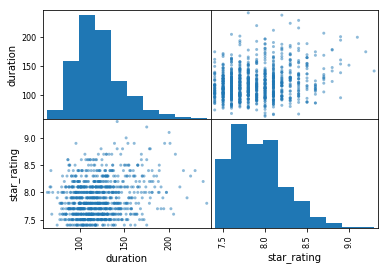

In [18]:
# Answer: use scatter_matrix funtion to plot scatter charts between duration and star_rating
pd.plotting.scatter_matrix(movies.loc[:,['duration','star_rating']]);

#### Calculate the average duration for each genre.

In [90]:
# Answer: use groupby function to calculate the mean of duration for each genre
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

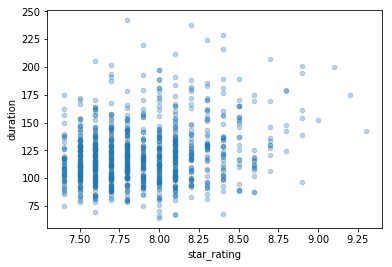

In [99]:
# Answer: this is another way of plotting the scatter chart
movies.plot(kind='scatter',x='star_rating',y='duration', alpha=0.3);

#### Determine the top rated movie (by star rating) for each genre.

In [115]:
# Answer:
#use idxmax formula to find the max star_rating for each genre and return the genre, title and rating
movies.ix[movies.groupby(['genre'], sort=False)['star_rating'].idxmax()][['genre', 'title', 'star_rating']]

,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
3,Action,The Dark Knight,9.0
5,Drama,12 Angry Men,8.9
6,Western,"The Good, the Bad and the Ugly",8.9
7,Adventure,The Lord of the Rings: The Return of the King,8.9
8,Biography,Schindler's List,8.9
25,Comedy,Life Is Beautiful,8.6
30,Animation,Spirited Away,8.6
38,Mystery,Rear Window,8.6
39,Horror,Psycho,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [26]:
# Answer: first save the title column in a variable
titles = movies['title']
#use the duplicated() formula to find any duplicate values in the title column and return the rows for those duplicates
#alternatively you can also do value_counts() for title and look for those greater than 1
dup_movies=movies.loc[titles.isin(titles[titles.duplicated()]),:]
print(dup_movies)
#we can see in the data that there are no real duplicates since the actors are different
#if there weere more data, it would not be as easy to check manually. use duplicated() on the whole DataFrame
dup_movies[dup_movies.duplicated()]

     star_rating                            title content_rating      genre  \
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
662          7.7                        True Grit          PG-13  Adventure   
678          7.7                   Les Miserables          PG-13      Drama   
703          7.6                          Dracula        UNRATED     Horror   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit            NaN  Adventure   

     duration                                        actors_list  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
662       110  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
678       158  [u'Hu

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [27]:
# Answer: to find the relevant genres I used value_counts
movies.loc[:,'genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [48]:
#create the manual list of relevant genres
rel_genres = {'Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery'}
#using isin create a boolean variable for rows with relevant genres
row_genre_bool = movies['genre'].isin(rel_genres)
#now use variable to slice into movies
new_movies = movies.loc[row_genre_bool,:]
#now use groupby to find mean for star rating for each genre
new_movies.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [92]:
# Answer: 

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [93]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [94]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!